### Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
pd.set_option('max_columns', None) 

In [3]:
data = pd.read_csv("E:\Datatrained projects\Datatrained-projects\Insurance claim - Fraud detection\Auto_Insurance_Claims_amount.csv")
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.sample(5)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
8045,YD28431,US,MO,Missouri,699.161418,No,Extended,Master,2/9/11,Employed,F,66346,Rural,Married,87,15,7,1,4,Personal Auto,Personal L1,Other,Agent,78.179743,Four-Door Car,Large
1628,IL83479,US,IA,Iowa,348.363044,No,Extended,College,1/2/11,Employed,F,42983,Suburban,Married,86,28,18,0,1,Personal Auto,Personal L3,Scratch/Dent,Call Center,412.800000,Four-Door Car,Medsize
2007,YZ56105,US,MO,Missouri,640.962746,No,Extended,High School or Below,1/11/11,Unemployed,F,0,Suburban,Single,99,14,48,2,9,Personal Auto,Personal L1,Collision,Branch,712.800000,Two-Door Car,Medsize
5074,ZD75163,US,OK,Oklahoma,929.541115,No,Premium,High School or Below,2/14/11,Unemployed,M,0,Suburban,Single,261,33,44,0,1,Corporate Auto,Corporate L3,Other,Call Center,2759.794354,Luxury Car,Medsize
4584,ZZ42291,US,MO,Missouri,4023.597310,No,Extended,Master,1/13/11,Employed,F,77143,Rural,Married,125,5,49,3,2,Personal Auto,Personal L3,Collision,Agent,176.006384,SUV,Small


### claim amount - Continous

In [5]:
data.nunique()

Customer                         9134
Country                             1
State Code                          5
State                               5
Claim Amount                     8041
Response                            2
Coverage                            3
Education                           5
Effective To Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location Code                       3
Marital Status                      3
Monthly Premium Auto              202
Months Since Last Claim            36
Months Since Policy Inception     100
Number of Open Complaints           6
Number of Policies                  9
Policy Type                         3
Policy                              9
Claim Reason                        4
Sales Channel                       4
Total Claim Amount               5106
Vehicle Class                       6
Vehicle Size                        3
dtype: int64

In [6]:
data.shape

(9134, 26)

In [7]:
data.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
data.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [9]:
data.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
data.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [11]:
features = ['Country', 'State Code', 'State',
       'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel','Vehicle Class', 'Vehicle Size'] ### categorical

In [12]:
len(features)

16

In [13]:
data['Effective To Date'].unique()

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [14]:
data = data.drop(columns=['Customer','Effective To Date'],axis=1)

### Encoding by label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in features:
    data[i] = lab_enc.fit_transform(data[i])
data.head()

,Country,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,3,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,0,1131.464935,0,1
2,0,4,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,0,2,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,0,1,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [16]:
data.dtypes

Country                            int32
State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

### EDA

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
data = data.drop(columns=['Country'],axis=1)

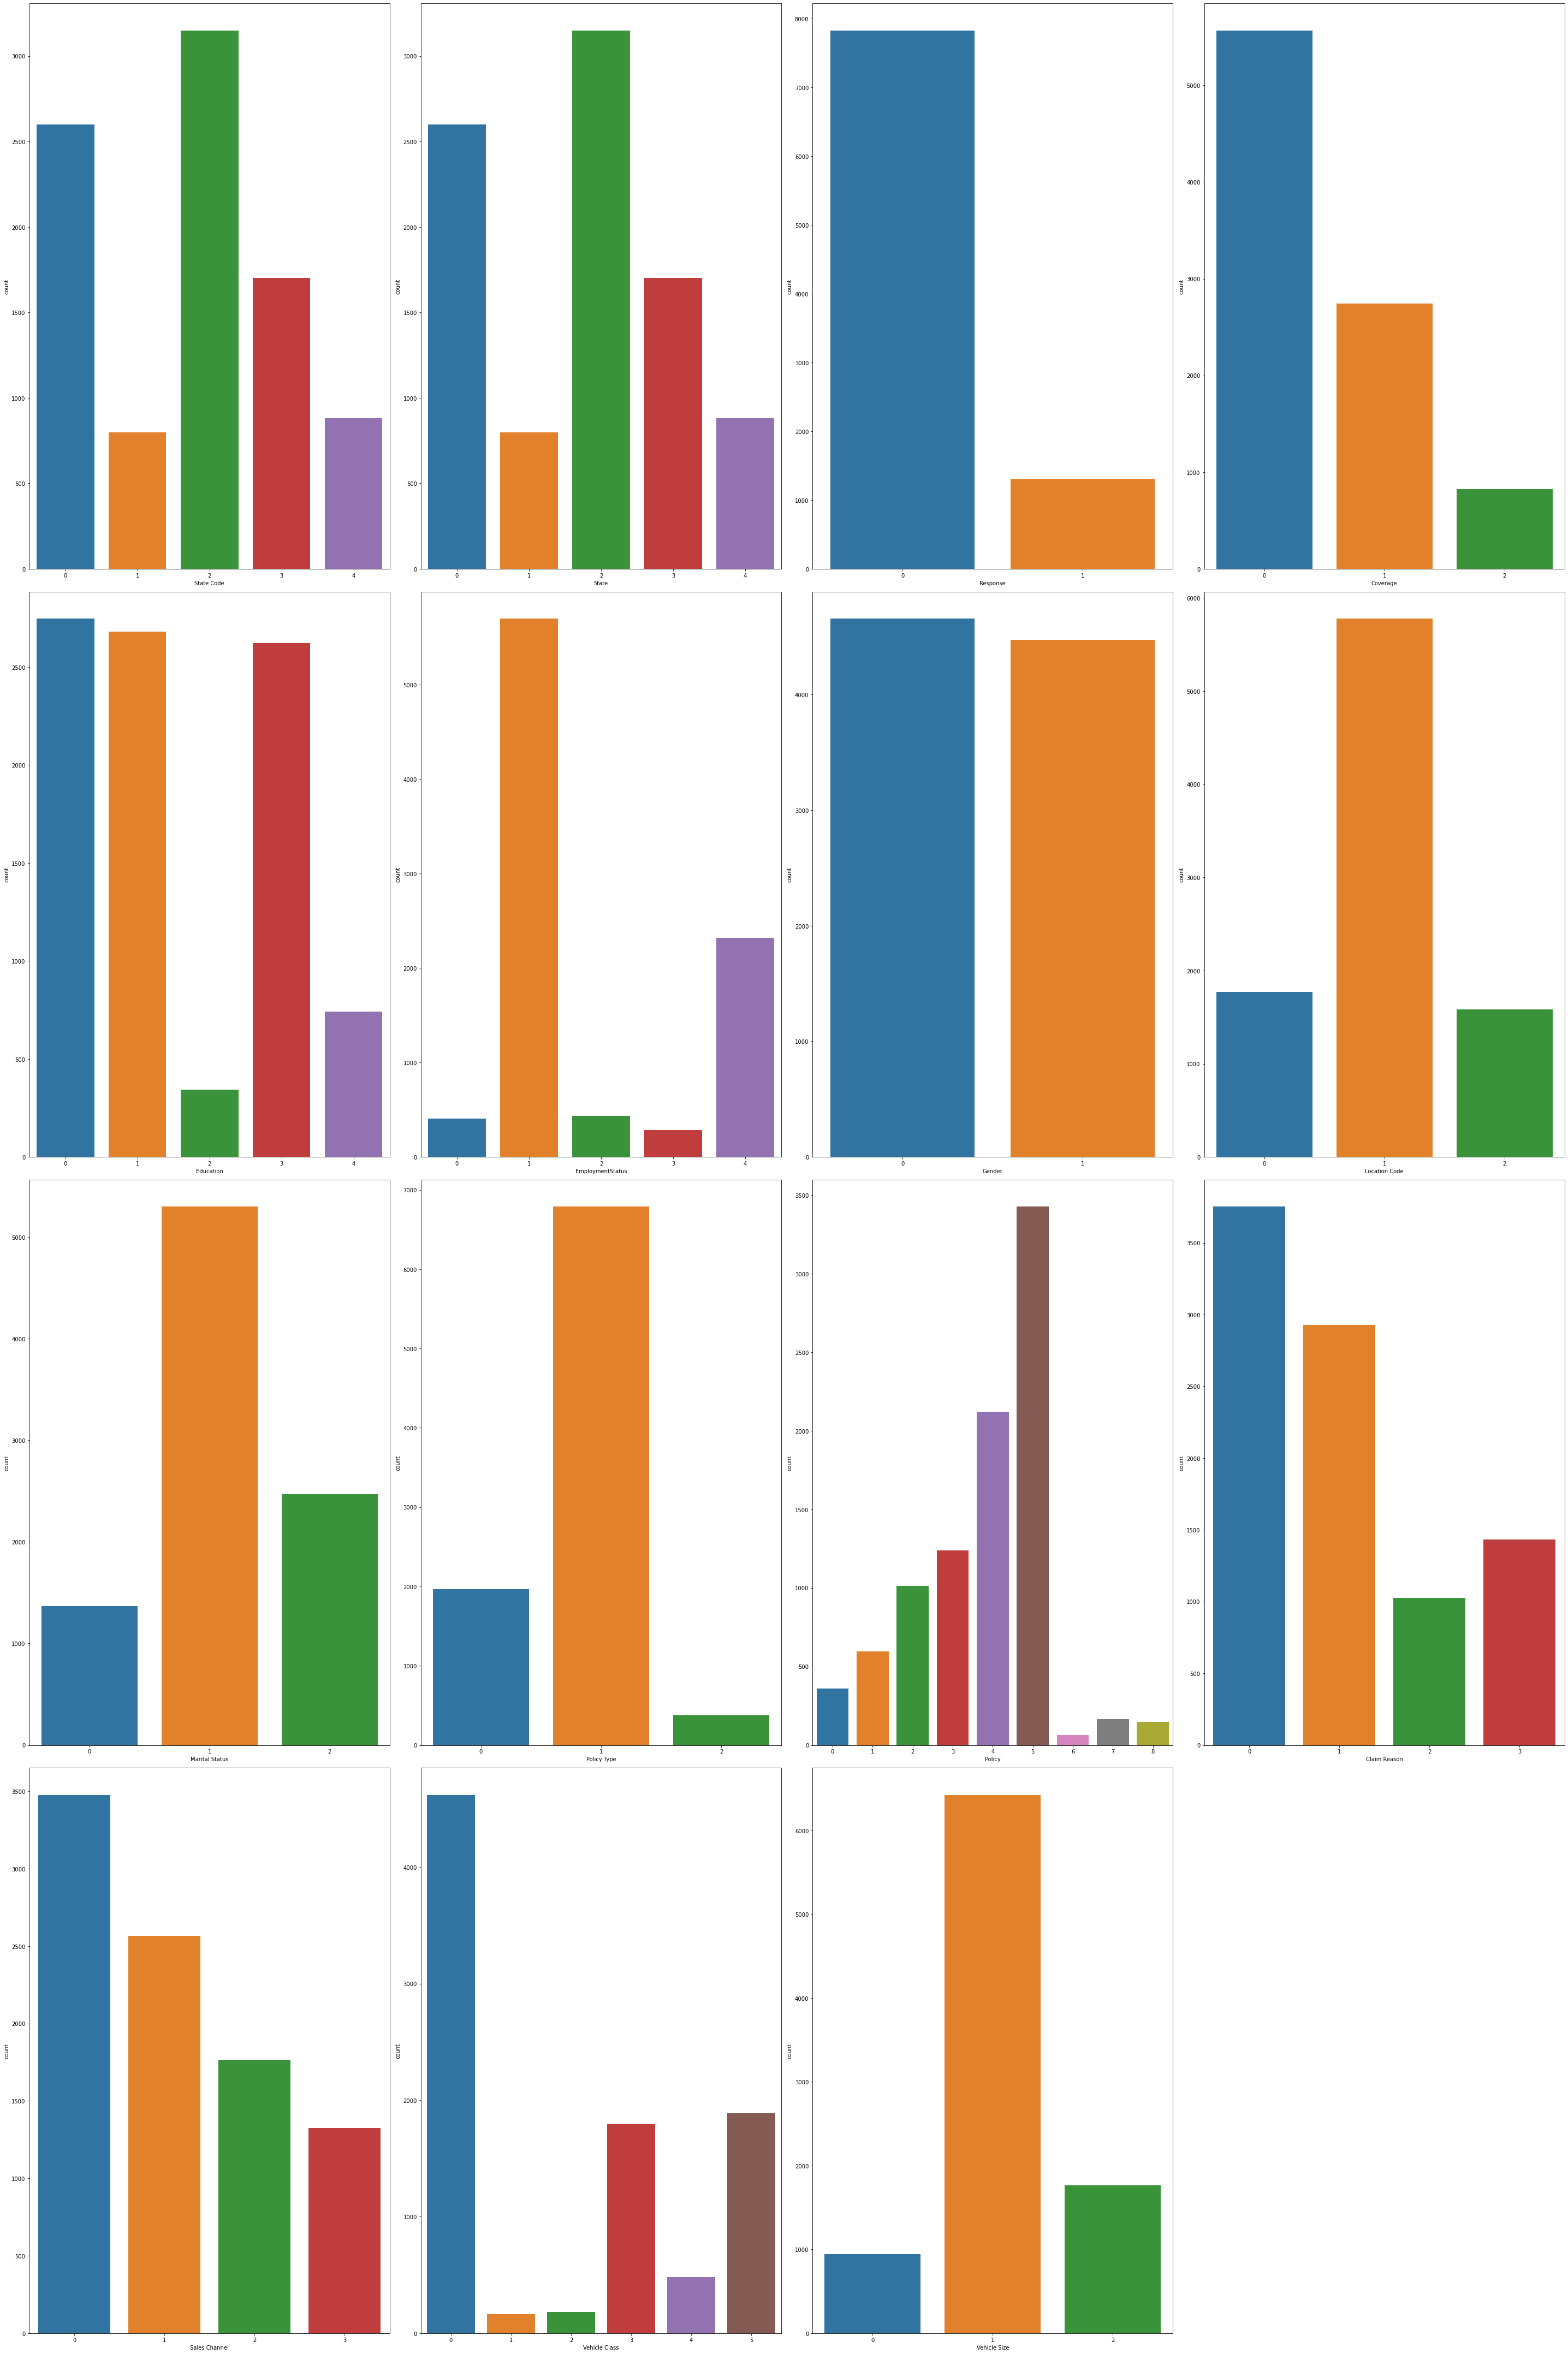

In [19]:
features = ['State Code', 'State',
       'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel','Vehicle Class', 'Vehicle Size'] ### categorical
plt.figure(figsize=(40,60))
for i in range(len(features)):
  plt.subplot(4,4,i+1)
  sns.countplot(data[features[i]])
  plt.xticks()
  plt.tight_layout()

In [20]:
features

['State Code',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

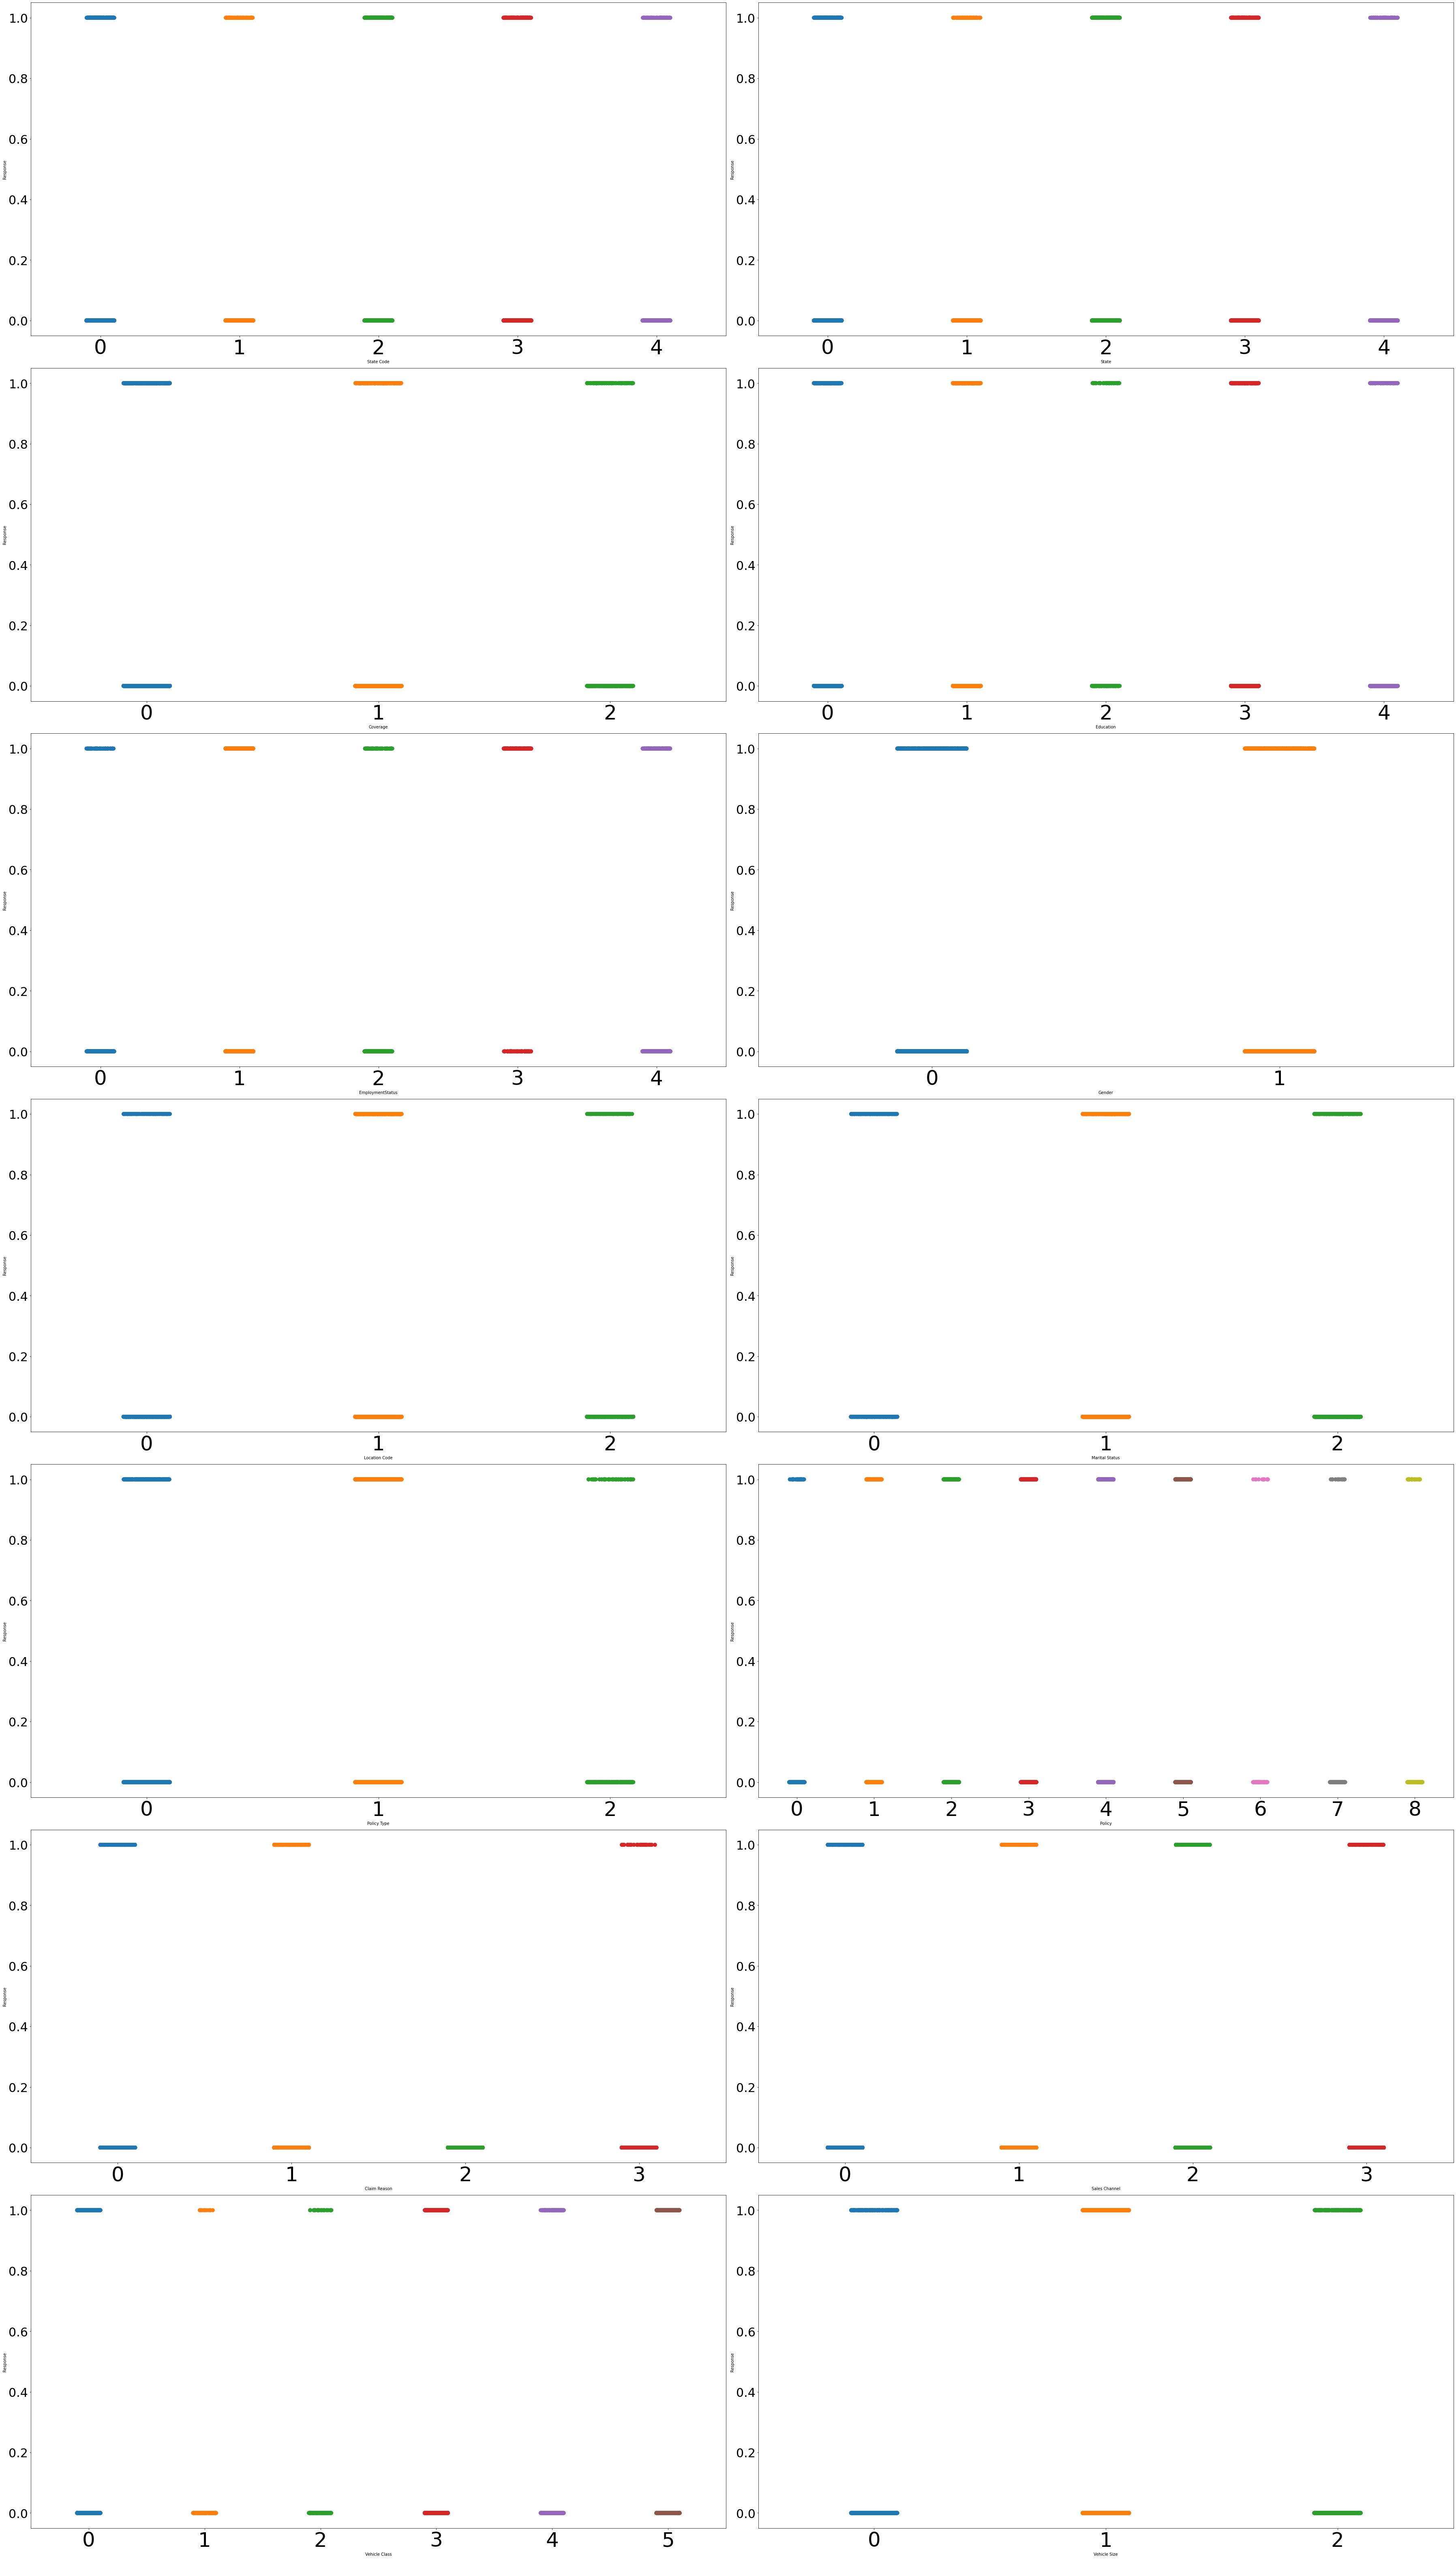

In [21]:
col1 = ['State Code', 'State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel','Vehicle Class', 'Vehicle Size']
plt.figure(figsize=(50,500))
for i in range(len(col1)):
  plt.subplot(40,2,i+1)
  sns.stripplot(y='Response',x=data[col1[i]],data=data,size=10)
  plt.xticks(fontsize=50)
  plt.yticks(fontsize=30)
  plt.tight_layout()

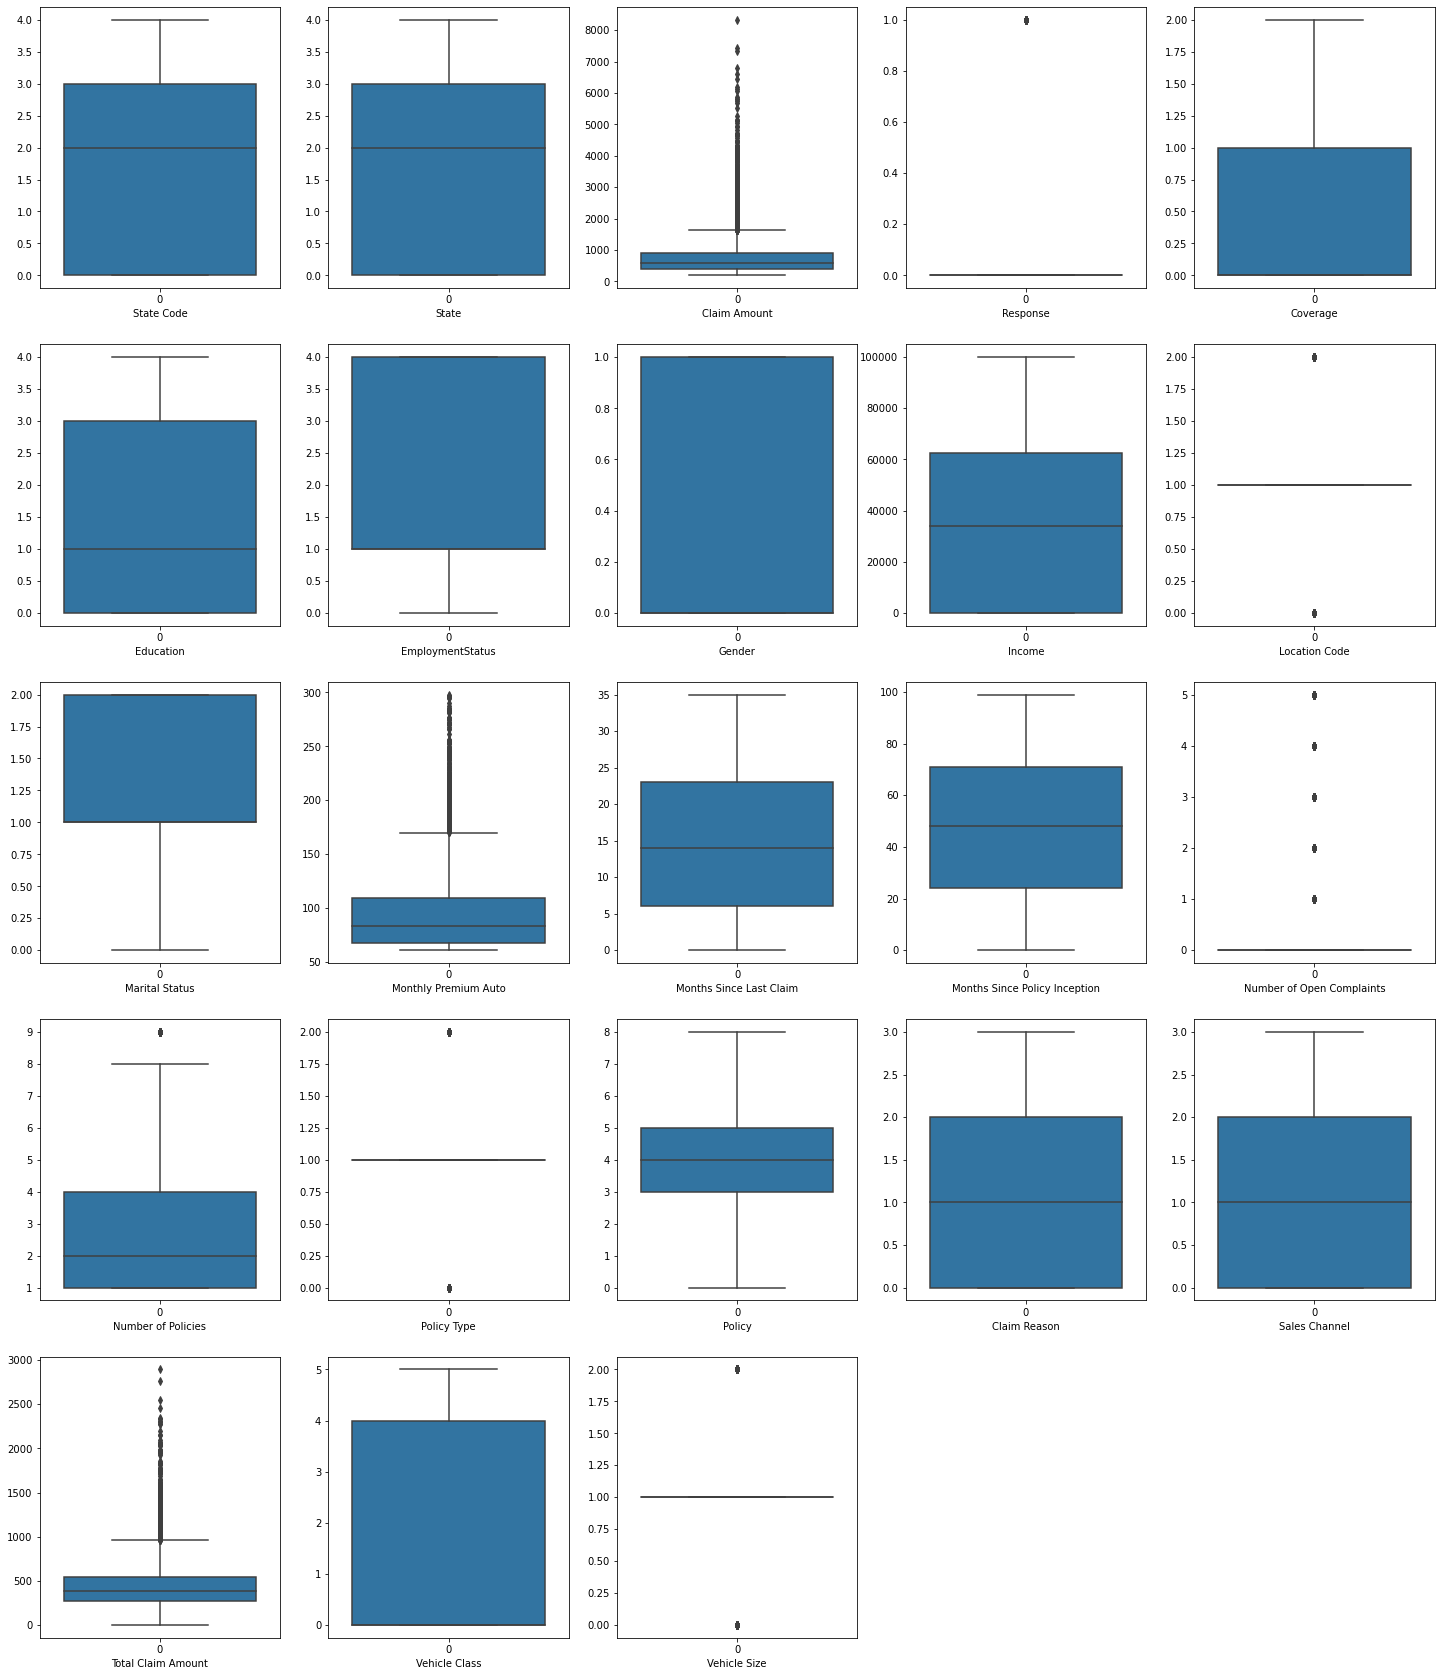

In [22]:
### checking for outliers
plt.figure(figsize=(25,30))
graph=1

for column in data:
    if graph<=26:
        ax=plt.subplot(5,5,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

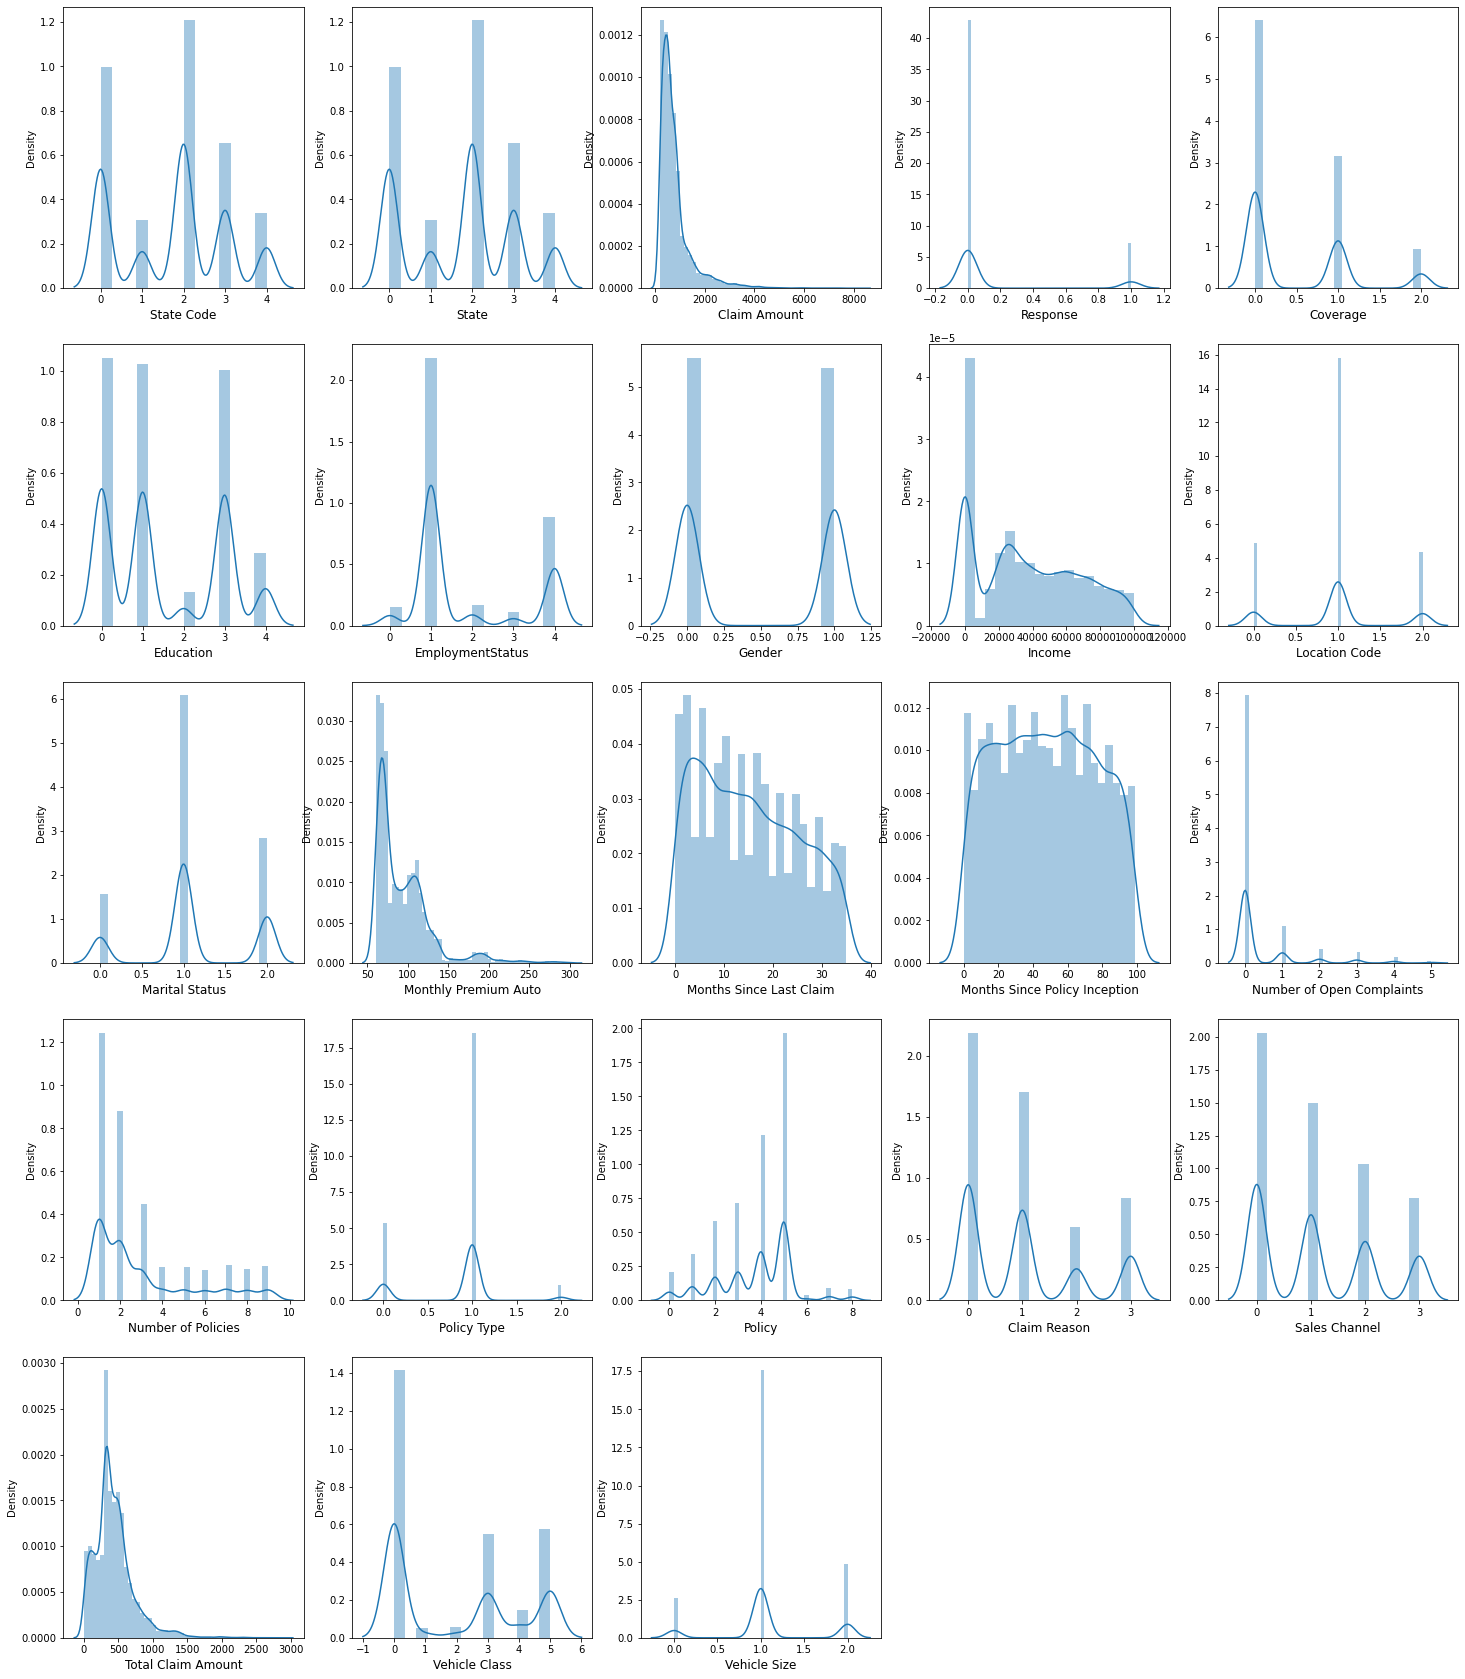

In [23]:
plt.figure(figsize=(25,30))
plotnumber=1

for column in data:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
    plotnumber +=1
plt.show()

### Claim amount, income, Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception','Total claim Amount' are continous columns and having skewness

<AxesSubplot:title={'center':'Correlation with response'}>

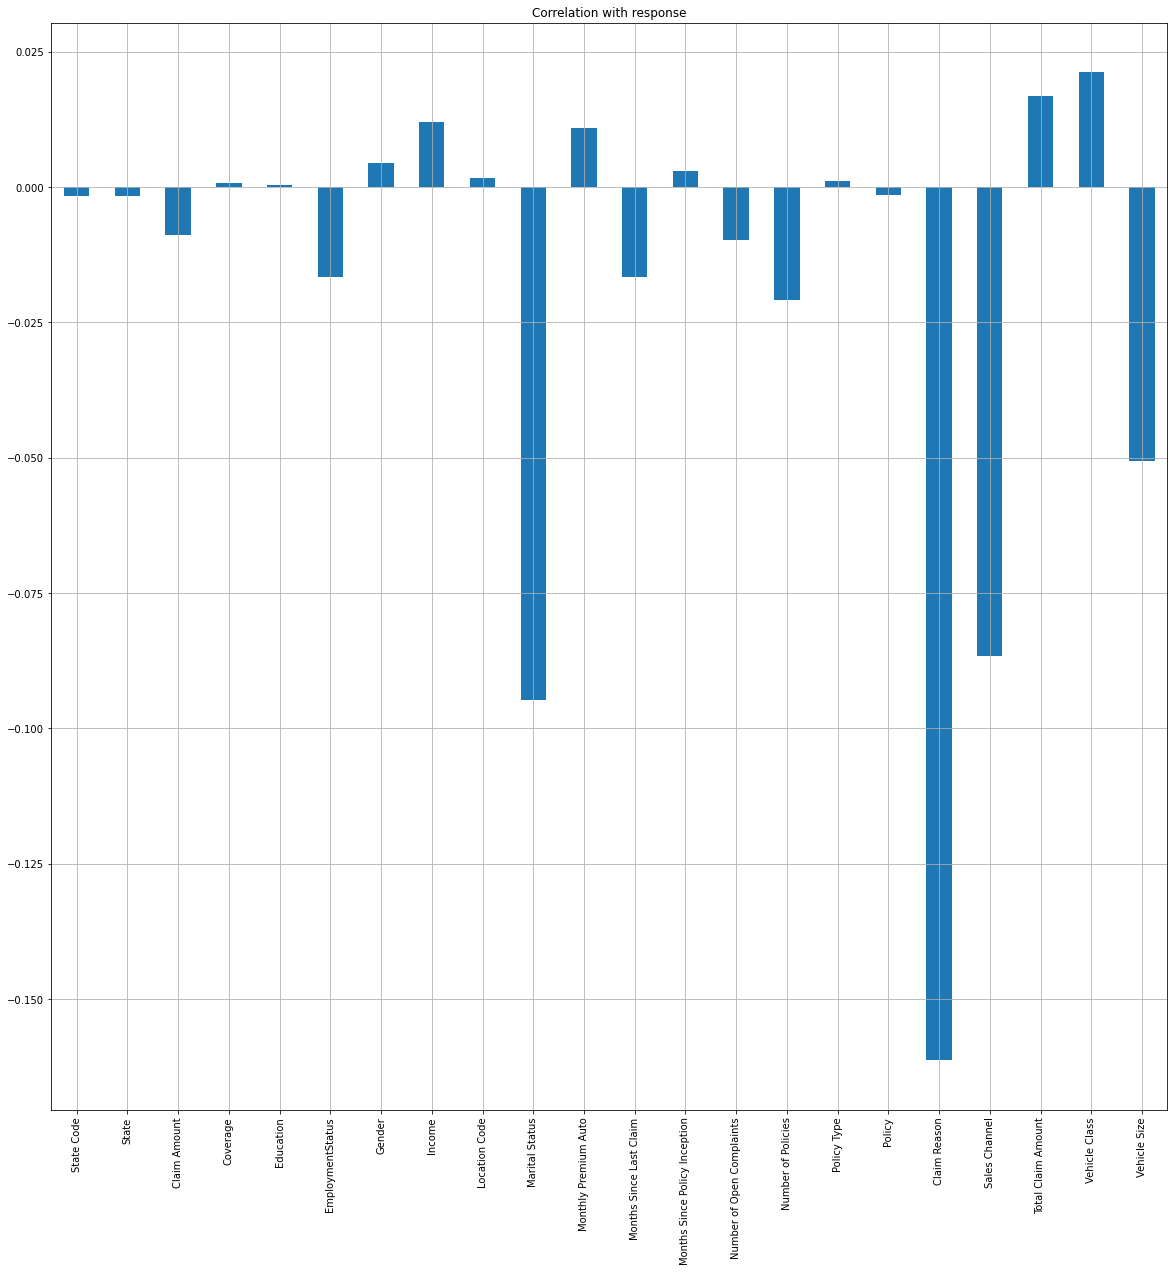

In [24]:
# visualize the correlation
data.drop('Response', axis =1).corrwith(data['Response']).plot(kind ='bar',grid = True, figsize = (20,20),
                                                   title = 'Correlation with response')

### Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

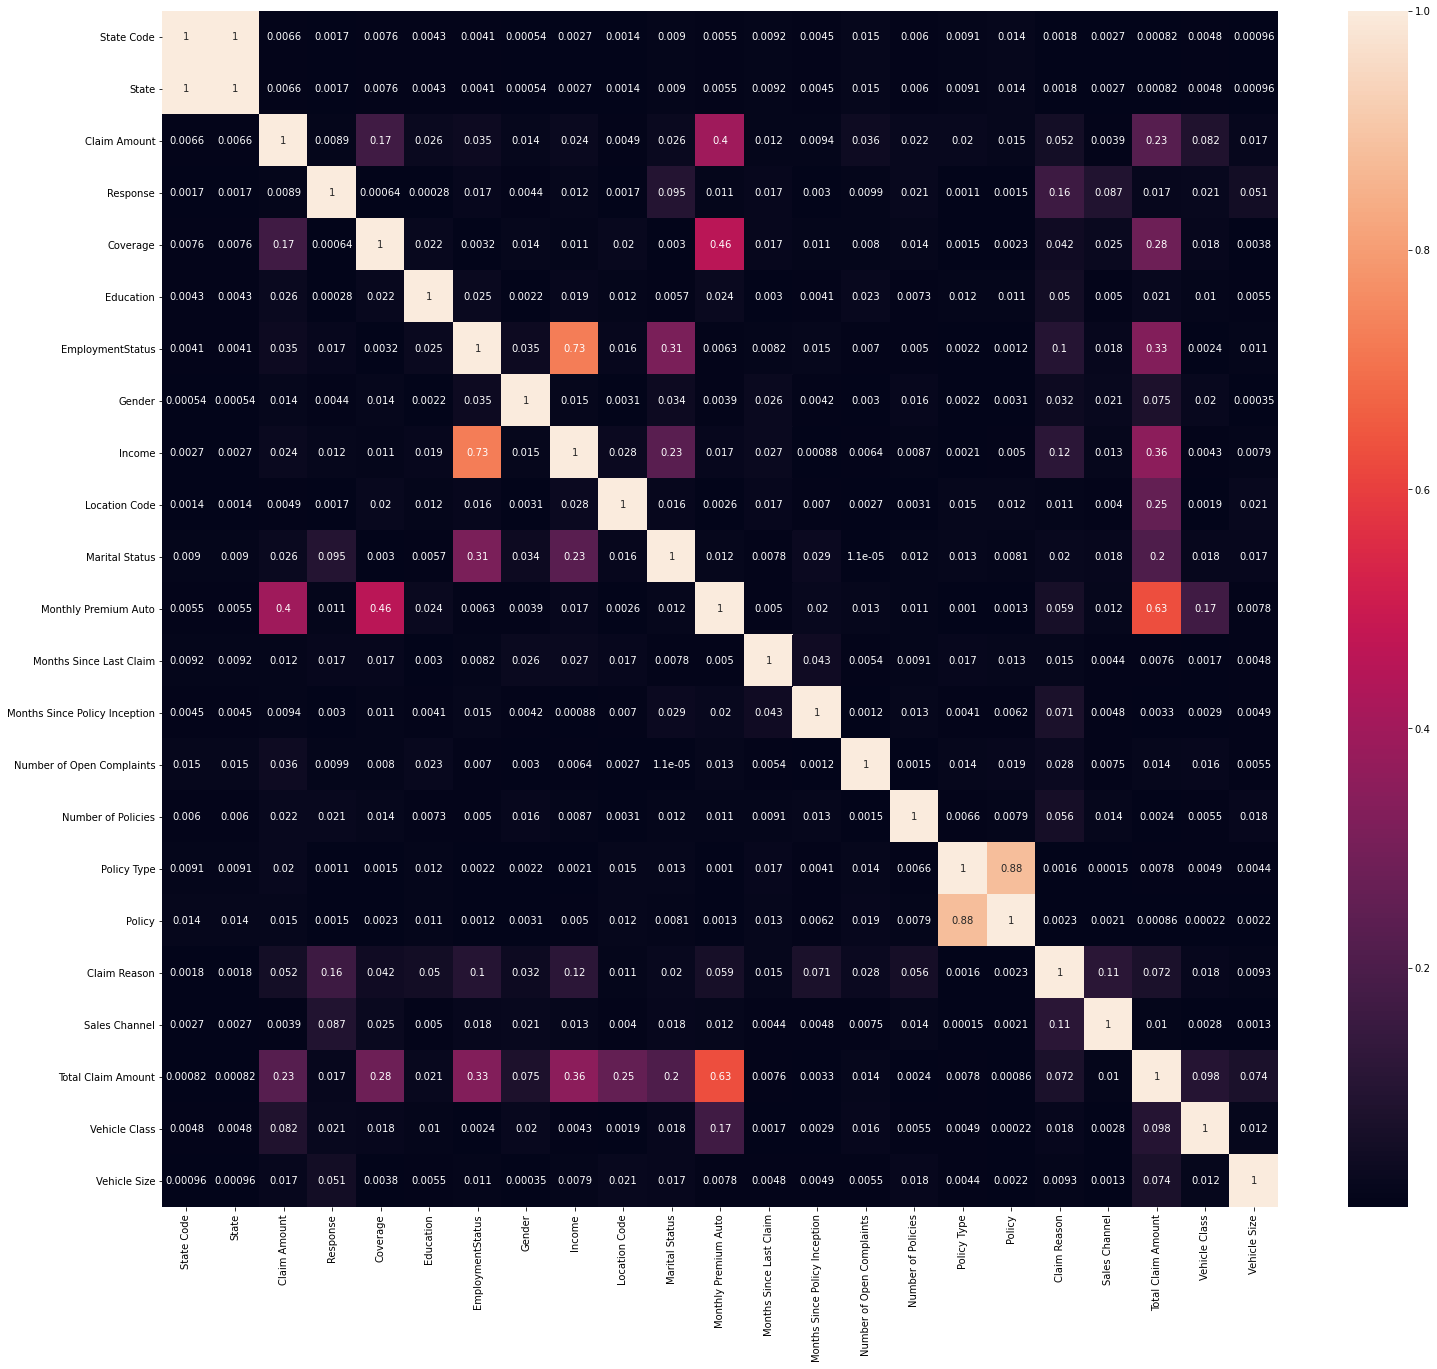

In [25]:
### plotting heatmap
plt.figure(figsize=(25,22))
sns.heatmap(abs(data.corr()),annot=True)
plt.show

### will check multicolinearity by vif value 

## Data preprocessing
- outliers removed - IQR 
- data normalization - power transformer(skewness)
- Vif value for multicolinearity

In [26]:
#quantile 1
q1=data.quantile(0.25)
#QUANTILE 3
q3=data.quantile(0.75)

IQR=q3-q1
IQR

State Code                           3.000000
State                                3.000000
Claim Amount                       496.791525
Response                             0.000000
Coverage                             1.000000
Education                            3.000000
EmploymentStatus                     3.000000
Gender                               1.000000
Income                           62320.000000
Location Code                        0.000000
Marital Status                       1.000000
Monthly Premium Auto                41.000000
Months Since Last Claim             17.000000
Months Since Policy Inception       47.000000
Number of Open Complaints            0.000000
Number of Policies                   3.000000
Policy Type                          0.000000
Policy                               2.000000
Claim Reason                         2.000000
Sales Channel                        2.000000
Total Claim Amount                 275.256594
Vehicle Class                     

#### Outfiers detection formula
##### higherside==> Q3+(1.5*IQR)
##### lowerside==>Q3 -(1.5*IQR)

In [27]:
itv_high=(q3['Claim Amount']+1.5*IQR['Claim Amount'])
print(itv_high)
index = np.where(data['Claim Amount']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

1641.403991175
(8317, 23)


,index,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,1,3,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,0,1131.464935,0,1
2,2,4,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,3,2,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,1,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,9128,2,2,410.039853,0,2,1,1,0,47761,1,2,104,16,58,0,1,1,4,0,1,541.282007,0,0
8313,9130,2,2,309.651122,1,1,1,1,0,21604,1,0,79,14,28,0,1,0,2,0,1,379.200000,0,1
8314,9131,2,2,816.389043,0,1,0,4,1,0,1,2,85,9,37,3,2,0,1,0,1,790.784983,0,1
8315,9132,2,2,752.444244,0,1,1,1,1,21941,1,1,96,34,3,0,3,1,4,3,1,691.200000,0,0


In [28]:
itv_high=(q3['Monthly Premium Auto']+1.5*IQR['Monthly Premium Auto'])
print(itv_high)
index = np.where(data['Monthly Premium Auto']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

170.5
(8033, 23)


,index,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,1,3,3,697.953590,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,3,0,1131.464935,0,1
2,2,4,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,3,2,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,1,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8028,9128,2,2,410.039853,0,2,1,1,0,47761,1,2,104,16,58,0,1,1,4,0,1,541.282007,0,0
8029,9130,2,2,309.651122,1,1,1,1,0,21604,1,0,79,14,28,0,1,0,2,0,1,379.200000,0,1
8030,9131,2,2,816.389043,0,1,0,4,1,0,1,2,85,9,37,3,2,0,1,0,1,790.784983,0,1
8031,9132,2,2,752.444244,0,1,1,1,1,21941,1,1,96,34,3,0,3,1,4,3,1,691.200000,0,0


In [29]:
itv_high=(q3['Total Claim Amount']+1.5*IQR['Total Claim Amount'])
print(itv_high)
index = np.where(data['Total Claim Amount']>itv_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

960.3997301250002
(7847, 23)


,index,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,1,1,276.351928,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,2,4,4,1288.743165,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
2,3,2,2,764.586183,0,0,0,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
3,4,1,1,281.369258,0,0,0,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1
4,5,0,0,825.629780,1,0,0,1,0,62902,0,1,69,14,94,0,2,1,5,1,3,159.383042,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842,9128,2,2,410.039853,0,2,1,1,0,47761,1,2,104,16,58,0,1,1,4,0,1,541.282007,0,0
7843,9130,2,2,309.651122,1,1,1,1,0,21604,1,0,79,14,28,0,1,0,2,0,1,379.200000,0,1
7844,9131,2,2,816.389043,0,1,0,4,1,0,1,2,85,9,37,3,2,0,1,0,1,790.784983,0,1
7845,9132,2,2,752.444244,0,1,1,1,1,21941,1,1,96,34,3,0,3,1,4,3,1,691.200000,0,0


### Data normalization

In [30]:
features = ['Claim Amount', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim','Months Since Policy Inception','Total Claim Amount']
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data[features]  = pt.fit_transform(data[features].values)
data.head()

,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,1,1,-1.324517,0,0,0,1,0,0.674654,1,1,-0.775386,1.475836,-1.718123,0,1,0,2,0,0,0.090944,5,1
2,4,4,1.713568,0,2,0,1,0,0.574205,1,1,1.093494,0.427946,-0.253140,0,2,1,5,0,0,0.896240,5,1
3,2,2,0.705315,0,0,0,4,1,-1.683753,1,1,1.036158,0.427946,0.648651,0,7,0,1,0,2,0.740436,3,1
4,1,1,-1.287891,0,0,0,1,1,0.502093,0,2,-0.473362,-0.129671,-0.040154,0,1,1,3,0,0,-1.208623,0,1
5,0,0,0.855059,1,0,0,1,0,0.755715,0,1,-0.775386,0.067171,1.502255,0,2,1,5,1,3,-1.080089,5,1


In [31]:
X = data.drop(columns = ['Response'],axis=1)
y = data['Response']

### Data scaling and VIF value calculation

In [32]:
data['Response'].value_counts()

0    6701
1    1146
Name: Response, dtype: int64

### data is imbalance so we have to apply SMOTE for imbalancing of data set

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

In [126]:
X_sm.shape

(13402, 22)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns

# lets check the vif
vif

,vif,Features
0,inf,State Code
1,inf,State
2,7.911349,Claim Amount
3,2.359756,Coverage
4,2.251913,Education
5,8.341645,EmploymentStatus
6,1.982520,Gender
7,10.290510,Income
8,4.600595,Location Code
9,4.433648,Marital Status


In [35]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

y = y_sm

In [36]:
Spercentile = SelectPercentile(score_func=chi2, percentile=80)
Spercentile.fit(X,y)

SelectPercentile(percentile=80,
                 score_func=<function chi2 at 0x000001C56F3FA280>)

In [37]:
# seperate the features to check p_values
cols = Spercentile.get_support(indices=True)
features = X.columns[cols]

In [38]:
data_scores = pd.DataFrame({'features':X.columns, 'Chi2score':Spercentile.scores_, 'pvalue':Spercentile.pvalues_,})
data_scores.sort_values(by='Chi2score',ascending=True)

,features,Chi2score,pvalue
8,Location Code,0.000061,9.937853e-01
15,Policy Type,0.000131,9.908507e-01
3,Coverage,0.005623,9.402274e-01
16,Policy,0.008412,9.269208e-01
2,Claim Amount,0.024431,8.757924e-01
12,Months Since Policy Inception,0.025891,8.721677e-01
0,State Code,0.043613,8.345754e-01
1,State,0.043613,8.345754e-01
13,Number of Open Complaints,0.170555,6.796186e-01
6,Gender,0.193905,6.596860e-01


###### when we apply chi2, we get p-values for all features. Based on the P_values, it will select top 80% of features.
###### Example if p-value < 0.05, it will reject null hypothesis is, there is no relationship between feature and target

In [39]:
print(cols)
print(features)

[ 0  1  4  5  6  7  9 10 11 12 13 14 17 18 19 20 21]
Index(['State Code', 'State', 'Education', 'EmploymentStatus', 'Gender',
       'Income', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')


In [58]:
X = data[features]
y = data.Response

In [59]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import scikitplot as skplt

In [60]:
for i in range(400,700):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = i)
    LR.fit(x_train,y_train)
    pred_train = LR.predict(x_train) 
    pred_test = LR.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print('Training accuracy score is',accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy score is',accuracy_score(y_test,pred_test)*100)

At random state 452 model perform very well
At random state 452
Training accuracy score is 85.90090807710689
Testing accuracy score is 85.85987261146497
At random state 457 model perform very well
At random state 457
Training accuracy score is 85.67787159471085
Testing accuracy score is 85.73248407643312
At random state 503 model perform very well
At random state 503
Training accuracy score is 85.96463278636291
Testing accuracy score is 85.98726114649682
At random state 577 model perform very well
At random state 577
Training accuracy score is 85.86904572247889
Testing accuracy score is 85.85987261146497
At random state 604 model perform very well
At random state 604
Training accuracy score is 85.83718336785088
Testing accuracy score is 85.79617834394905
At random state 643 model perform very well
At random state 643
Training accuracy score is 85.74159630396686
Testing accuracy score is 85.73248407643312
At random state 681 model perform very well
At random state 681
Training accuracy 

### random_state = 604

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=604)

In [80]:
#### as we have to balance data
from collections import Counter
Counter(y_train)

Counter({0: 4679, 1: 813})

In [81]:
# if you face any issues with "from imblearn.over_sampling import SMOTE",then execute 5 lines first
from imblearn.over_sampling import SMOTE
sm = SMOTE()
#Oversampling and upsampling
ove_smp = SMOTE(1)
X_train_ns,y_train_ns = ove_smp.fit_resample(x_train,y_train)

print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train_ns)))

The no. of classes before fit Counter({0: 4679, 1: 813})
The no. of classes after fit Counter({0: 4679, 1: 4679})


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
lr = LogisticRegression()
lr.fit(X_train_ns,y_train_ns)
pred = lr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))
print('Confusion matrix\n',confusion_matrix(y_test,pred))

62.46284501061571
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      2022
           1       0.22      0.65      0.33       333

    accuracy                           0.62      2355
   macro avg       0.57      0.63      0.53      2355
weighted avg       0.82      0.62      0.68      2355

Confusion matrix
 [[1256  766]
 [ 118  215]]


In [84]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_ns,y_train_ns)
pred_dt = dt.predict(x_test)
print(accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_dt))

92.10191082802548
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2022
           1       0.64      0.99      0.78       333

    accuracy                           0.92      2355
   macro avg       0.82      0.95      0.87      2355
weighted avg       0.95      0.92      0.93      2355

Confusion matrix
 [[1838  184]
 [   2  331]]


#### False negative = 2 so recall value is important to us in this decision tree is giving excellent result 

### RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_ns,y_train_ns)
pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,pred_rf)*100)
print(classification_report(y_test,pred_rf))
print('Confusion matrix\n',confusion_matrix(y_test,pred_rf))

98.68365180467092
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2022
           1       0.91      1.00      0.96       333

    accuracy                           0.99      2355
   macro avg       0.96      0.99      0.97      2355
weighted avg       0.99      0.99      0.99      2355

Confusion matrix
 [[1991   31]
 [   0  333]]


##### Random forest is better than decision tree

### GradientBoostingClassifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_ns,y_train_ns)
pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,pred_gb)*100)
print(classification_report(y_test,pred_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_gb))

77.36730360934183
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      2022
           1       0.37      0.86      0.52       333

    accuracy                           0.77      2355
   macro avg       0.67      0.81      0.69      2355
weighted avg       0.89      0.77      0.80      2355

Confusion matrix
 [[1535  487]
 [  46  287]]


### Xtreme gradient boosting 

In [88]:
from xgboost import XGBClassifier
xgbt = XGBClassifier()
xgbt.fit(X_train_ns,y_train_ns)
pred_xgbt = xgbt.predict(x_test)
print(accuracy_score(y_test,pred_xgbt)*100)
print(classification_report(y_test,pred_xgbt))
print('Confusion matrix\n',confusion_matrix(y_test,pred_xgbt))

[20:25:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
97.36730360934183
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2022
           1       0.84      1.00      0.91       333

    accuracy                           0.97      2355
   macro avg       0.92      0.98      0.95      2355
weighted avg       0.98      0.97      0.97      2355

Confusion matrix
 [[1960   62]
 [   0  333]]


In [89]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_ns,y_train_ns)
pred_svc = svc.predict(x_test)
print(accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_svc))

76.39065817409767
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2022
           1       0.35      0.76      0.48       333

    accuracy                           0.76      2355
   macro avg       0.65      0.76      0.66      2355
weighted avg       0.86      0.76      0.80      2355

Confusion matrix
 [[1547  475]
 [  81  252]]


### Cross validation

In [90]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR, X, y, cv=5)
print("Cross validation score of logistic regression model is",scr.mean()*100)

Cross validation score of logistic regression model is 85.81626497464813


In [91]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dt, X, y, cv=5)
print("Cross validation score of Decision tree model is",scr.mean()*100)

Cross validation score of Decision tree model is 96.92873468029049


In [92]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf, X, y, cv=5)
print("Cross validation score of Random forest  model is",scr.mean()*100)

Cross validation score of Random forest  model is 99.84706068614436


In [93]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(gb, X, y, cv=5)
print("Cross validation score of gradient boosting model is",scr.mean()*100)

Cross validation score of gradient boosting model is 87.9188415681212


In [94]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(xgbt, X, y, cv=5)
print("Cross validation score of xtreme gradient boosting model is",scr.mean()*100)

[20:27:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [95]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(svc, X, y, cv=5)
print("Cross validation score of support vector machine model is",scr.mean()*100)

Cross validation score of support vector machine model is 85.45940657565166


### plot

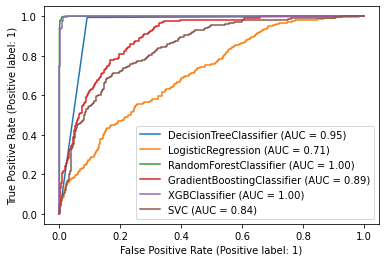

In [96]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(LR, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgbt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plt.show()

### Choosing random forest for hypertuning (gridsearchcv)

In [97]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30,random_state=604)
params = {'n_estimators':range(100,120,10),
        'min_samples_split':range(2,4),
        'min_samples_leaf':range(1,2,1)
        }
GCV2 = GridSearchCV(rf,param_grid = params)
GCV2.fit(x_train,y_train)
print('best_pram', GCV2.best_params_)

rf=GCV2.best_estimator_ #reinstantiating with best params

rf.fit(X_train_ns,y_train_ns)
y_pred = rf.predict(x_test)

print('\Accracy score =>','\n',accuracy_score(y_test,y_pred)*100)

best_pram {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}
\Accracy score => 
 98.76857749469214


#### Accuracy increased by hypertuning 

In [98]:
import joblib
joblib.dump(GCV2.best_estimator_,'Insurance Claim prediction .pkl')

['Insurance Claim prediction .pkl']

In [99]:
model=joblib.load("E:\Datatrained projects\Datatrained-projects\Insurance claim - Fraud detection\Insurance Claim prediction .pkl")
y_preds=model.predict(x_test)
predicted=pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,1
1,0
2,0
3,0
4,0
...,...
2350,1
2351,0
2352,1
2353,0
